### Análise Exploratória

Inicialmente uma análise exploratória para entender o dataset que será utilizado para modelagem.

In [15]:
import fireducks.pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("fraud_data.csv")

In [28]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [24]:
#Garantir que o campo is_fraud seja apenas 0 e 1
df['is_fraud'] = pd.to_numeric(df['is_fraud'], errors='coerce').fillna(0).astype(int)
df['is_fraud'].unique()

array([1, 0])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

O gráfico abaixo mostra que por característica é um dataset desbalanceado, então métricas como recall e F1 devem ser utilizadas para avaliar os resultados.

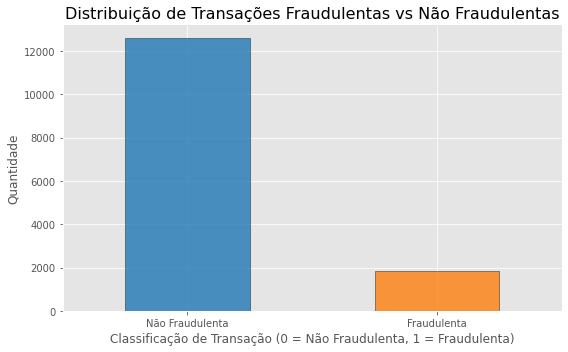

In [64]:
import matplotlib.pyplot as plt

colors = ['#1f77b4', '#ff7f0e']  # Azul para 0 e laranja para 1
plt.figure(figsize=(8, 5))

# Alterar o estilo para melhorar a visualização
plt.style.use('ggplot')

# Criar o gráfico de barras
df['is_fraud'].value_counts().sort_index().plot(
    kind='bar',
    color=colors,
    alpha=0.8,
    edgecolor='black'
)

# Configurar rótulos e título
plt.xlabel('Classificação de Transação (0 = Não Fraudulenta, 1 = Fraudulenta)', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.title('Distribuição de Transações Fraudulentas vs Não Fraudulentas', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Não Fraudulenta', 'Fraudulenta'], rotation=0)


# Mostrar o gráfico
plt.tight_layout()
plt.show()

Os dois gráficos abaixo mostram que o período da madrigada meia noite às seis da manhã acontecem o maior número de fraudes e possivelmente as maiores tentativas. Algo que pode ser trabalhado na limpeza de dados e testado hipoteses.

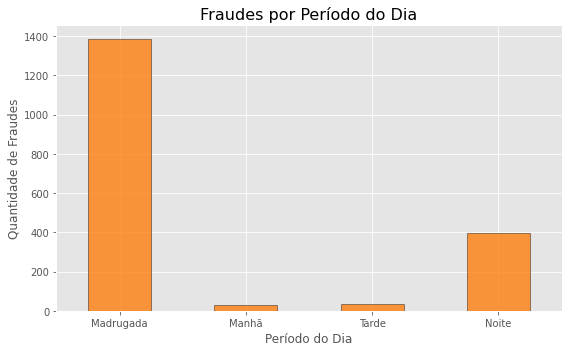

periodo_do_dia
Madrugada    1385
Manhã          29
Tarde          36
Noite         394
Name: is_fraud, dtype: int64

In [29]:
# Criar a coluna 'periodo_do_dia' com base na hora da transação
def definir_periodo(hora):
    if 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noite'
    else:
        return 'Madrugada'

# Converter trans_date_trans_time para datetime caso necessário
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')

# Extrair a hora e definir o período do dia
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['periodo_do_dia'] = df['transaction_hour'].apply(definir_periodo)

# Agrupar por período do dia e somar as fraudes
fraudes_por_periodo = df.groupby('periodo_do_dia')['is_fraud'].sum().reindex(['Madrugada', 'Manhã', 'Tarde', 'Noite'])

# Exibir os resultados
fraudes_por_periodo.plot(kind='bar', figsize=(8, 5), color='#ff7f0e', edgecolor='black', alpha=0.8)
plt.title('Fraudes por Período do Dia', fontsize=16)
plt.xlabel('Período do Dia', fontsize=12)
plt.ylabel('Quantidade de Fraudes', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

fraudes_por_periodo


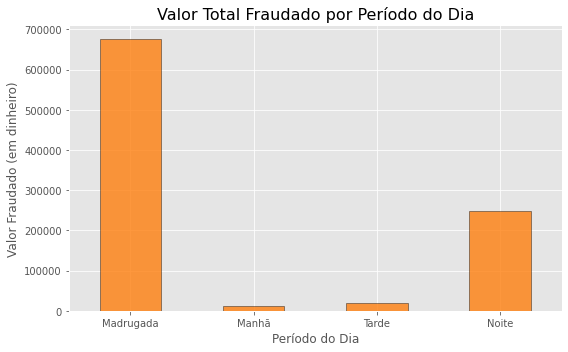

periodo_do_dia
Madrugada    676147.95
Manhã         11628.38
Tarde         20515.23
Noite        247330.12
Name: amt, dtype: float64

In [32]:
# Agrupar por período do dia e somar os valores de 'amt' para transações fraudulentas
valor_fraudado_por_periodo = df[df['is_fraud'] == 1].groupby('periodo_do_dia')['amt'].sum().reindex(['Madrugada', 'Manhã', 'Tarde', 'Noite'])

# Plotar o gráfico
plt.figure(figsize=(8, 5))
valor_fraudado_por_periodo.plot(kind='bar', color='#ff7f0e', edgecolor='black', alpha=0.8)
plt.title('Valor Total Fraudado por Período do Dia', fontsize=16)
plt.xlabel('Período do Dia', fontsize=12)
plt.ylabel('Valor Fraudado (em dinheiro)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

valor_fraudado_por_periodo


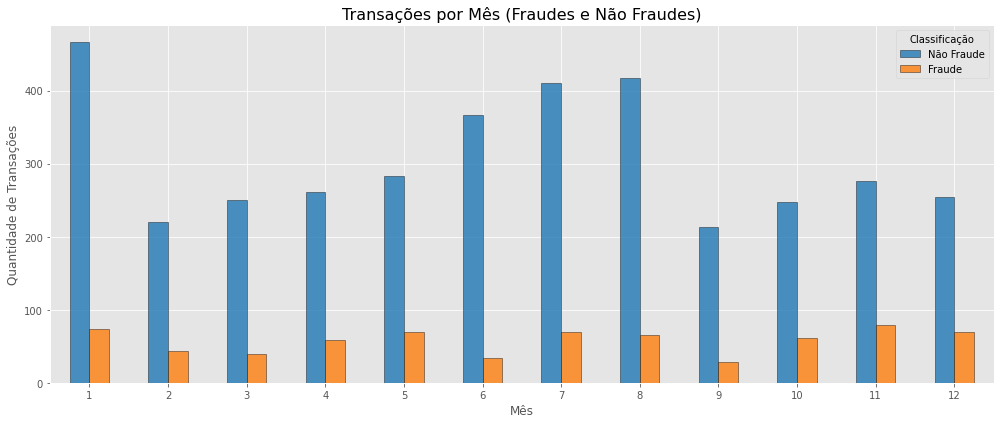

In [69]:
# Contar o número de transações (fraude e não fraude) por mês
transacoes_por_mes = df.groupby(['transaction_month', 'is_fraud'])['is_fraud'].count().unstack(fill_value=0)

# Plotar o gráfico lado a lado
transacoes_por_mes.plot(
    kind='bar',
    figsize=(14, 6),
    color=['#1f77b4', '#ff7f0e'],
    edgecolor='black',
    alpha=0.8
)
plt.title('Transações por Mês (Fraudes e Não Fraudes)', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Não Fraude', 'Fraude'], title='Classificação', fontsize=10)
plt.tight_layout()
plt.show()


In [52]:
invalid_amt_values = fraudes['amt'].apply(lambda x: isinstance(x, (int, float))).value_counts()

amt
True    1844
Name: count, dtype: int64

O gŕafico abaixo mostra os valores com mais frequência de fraudes e um pico em valores menores de 100$, uma boa concentração entre 200$ e 400$ e  poucas incidências acima de 1000.

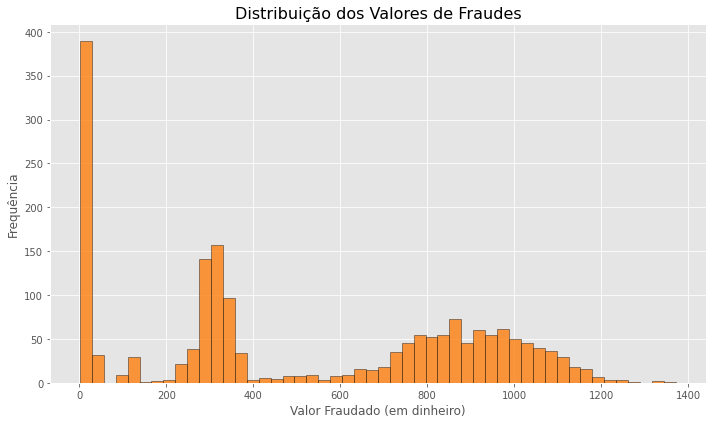

In [65]:
# Simplificar o processo e garantir que o gráfico seja criado corretamente
plt.figure(figsize=(10, 6))
plt.hist(fraudes['amt'], bins=50, color='#ff7f0e', edgecolor='black', alpha=0.8)
plt.title('Distribuição dos Valores de Fraudes', fontsize=16)
plt.xlabel('Valor Fraudado (em dinheiro)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.tight_layout()
plt.show()

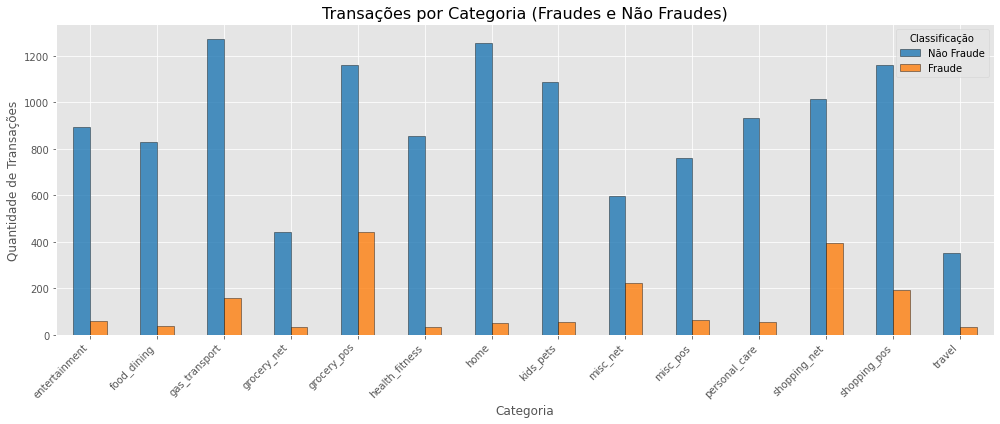

is_fraud,0,1
category,,
entertainment,894,59
food_dining,831,39
gas_transport,1271,159
grocery_net,442,32
grocery_pos,1158,444
health_fitness,855,36
home,1253,51
kids_pets,1085,56
misc_net,598,223


In [67]:
# Contar o número de transações (fraude e não fraude) por estado
transacoes_por_estado = df.groupby(['category', 'is_fraud'])['is_fraud'].count().unstack(fill_value=0)

# Plotar o gráfico lado a lado
transacoes_por_estado.plot(
    kind='bar',
    figsize=(14, 6),
    color=['#1f77b4', '#ff7f0e'],
    edgecolor='black',
    alpha=0.8
)
plt.title('Transações por Categoria (Fraudes e Não Fraudes)', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(['Não Fraude', 'Fraude'], title='Classificação', fontsize=10)
plt.tight_layout()
plt.show()

transacoes_por_estado


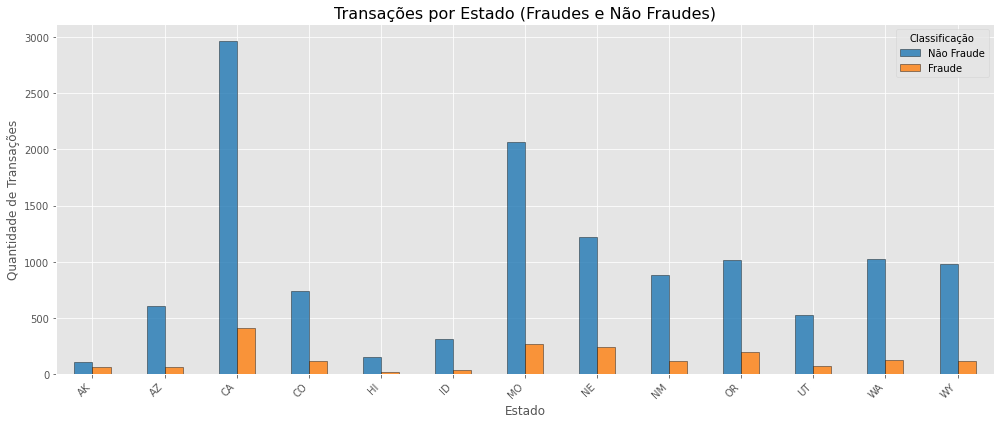

is_fraud,0,1
state,,
AK,108,65
AZ,609,64
CA,2965,410
CO,741,115
HI,156,16
ID,314,33
MO,2062,267
NE,1222,238
NM,882,121


In [63]:
# Contar o número de transações (fraude e não fraude) por estado
transacoes_por_estado = df.groupby(['state', 'is_fraud'])['is_fraud'].count().unstack(fill_value=0)

# Plotar o gráfico lado a lado
transacoes_por_estado.plot(
    kind='bar',
    figsize=(14, 6),
    color=['#1f77b4', '#ff7f0e'],
    edgecolor='black',
    alpha=0.8
)
plt.title('Transações por Estado (Fraudes e Não Fraudes)', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(['Não Fraude', 'Fraude'], title='Classificação', fontsize=10)
plt.tight_layout()
plt.show()

transacoes_por_estado
